In [ ]:
pip install flask

In [ ]:
from flask import Flask

# predicted_label

app = Flask(__name__)

@app.route("/result",methods=["POST","GET"])

def result():
  return {"API":"Response Positive"}


if __name__=='__main__':
  app.run(debug=True,port=2000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:2000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [1]:
from flask import Flask, request, jsonify
from keras.models import load_model
import numpy as np
from PIL import Image
import io
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Initialize Flask application
app = Flask(__name__)

# Load the trained model
model = load_model('your_model.h5')

# Define a function to preprocess the image
def preprocess_image(image):
    # Resize the image to match the input shape of the model
    img = image.resize((512, 512))
    # Convert image to numpy array
    img_array = np.asarray(img)
    # Normalize pixel values
    img_array = img_array / 255.0
    # Expand dimensions to create a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Define a function to handle the prediction
def predict_image():
    # Open file dialog to select an image file
    file_path = filedialog.askopenfilename()
    # Load image into PIL format
    img = Image.open(file_path)
    # Preprocess the image
    img_array = preprocess_image(img)
    # Perform prediction using the model
    prediction = model.predict(img_array)
    # Convert prediction to human-readable format
    predicted_class = np.argmax(prediction)
    # Display prediction result in a label
    result_label.config(text=f"Predicted class: {predicted_class}")

# Define GUI
root = tk.Tk()
root.title("Image Classifier")

# Create a button to select an image
select_button = tk.Button(root, text="Select Image", command=predict_image)
select_button.pack()

# Create a label to display prediction result
result_label = tk.Label(root, text="")
result_label.pack()

# Run the Flask application
if __name__ == '__main__':
    app.run(debug=True, threaded=False)  # Disable threading for Tkinter compatibility


OSError: No file or directory found at your_model.h5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 19.5 MB/s eta 0:00:00


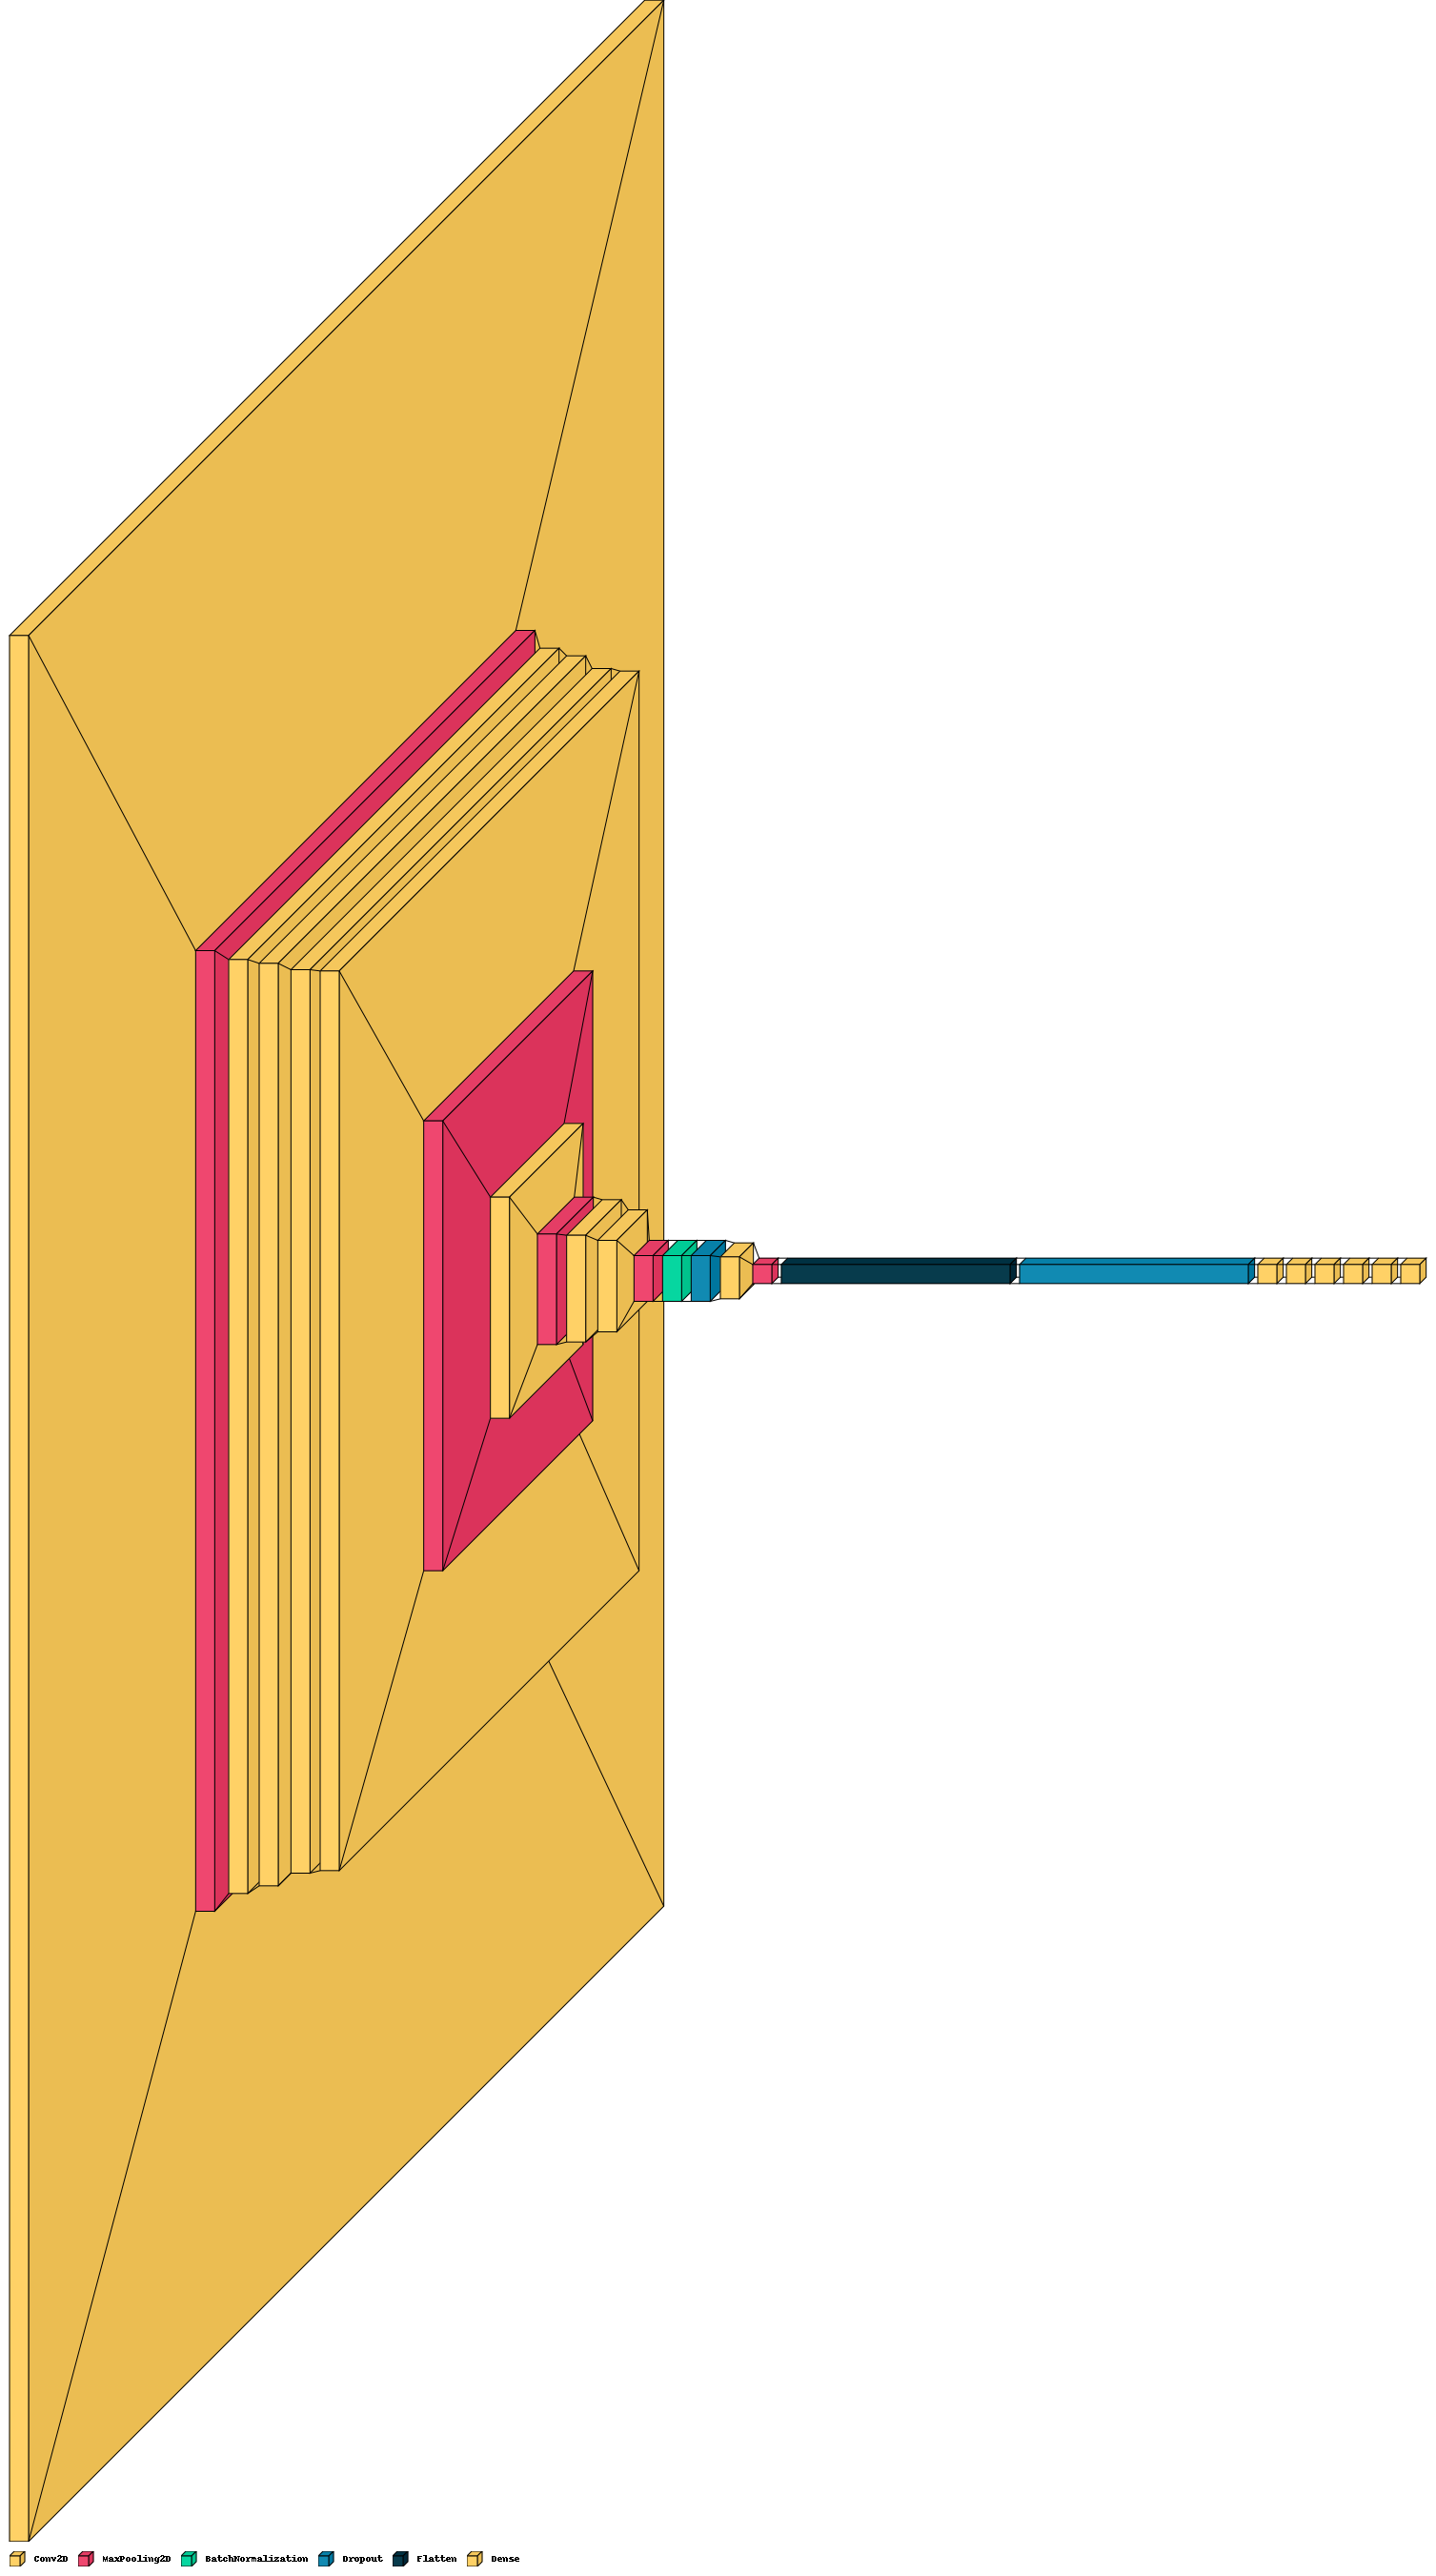

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import plot_model

num_classes = 4
# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, (8, 8), activation="relu", input_shape=(512, 512, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (8, 8), activation="relu"))
model.add(Conv2D(64, (4, 4), activation="relu"))
model.add(Conv2D(64, (6, 6), activation="relu"))
model.add(Conv2D(64, (2, 2), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(84, (4, 4), activation="relu", strides=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(56, (2, 2), activation="relu"))
model.add(Conv2D(34, (5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Conv2D(96, (2, 2), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dense(94, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
%pip install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model,to_file='output.png',legend=True) # write to disk# write and show

visualkeras.layered_view(model,legend=True)

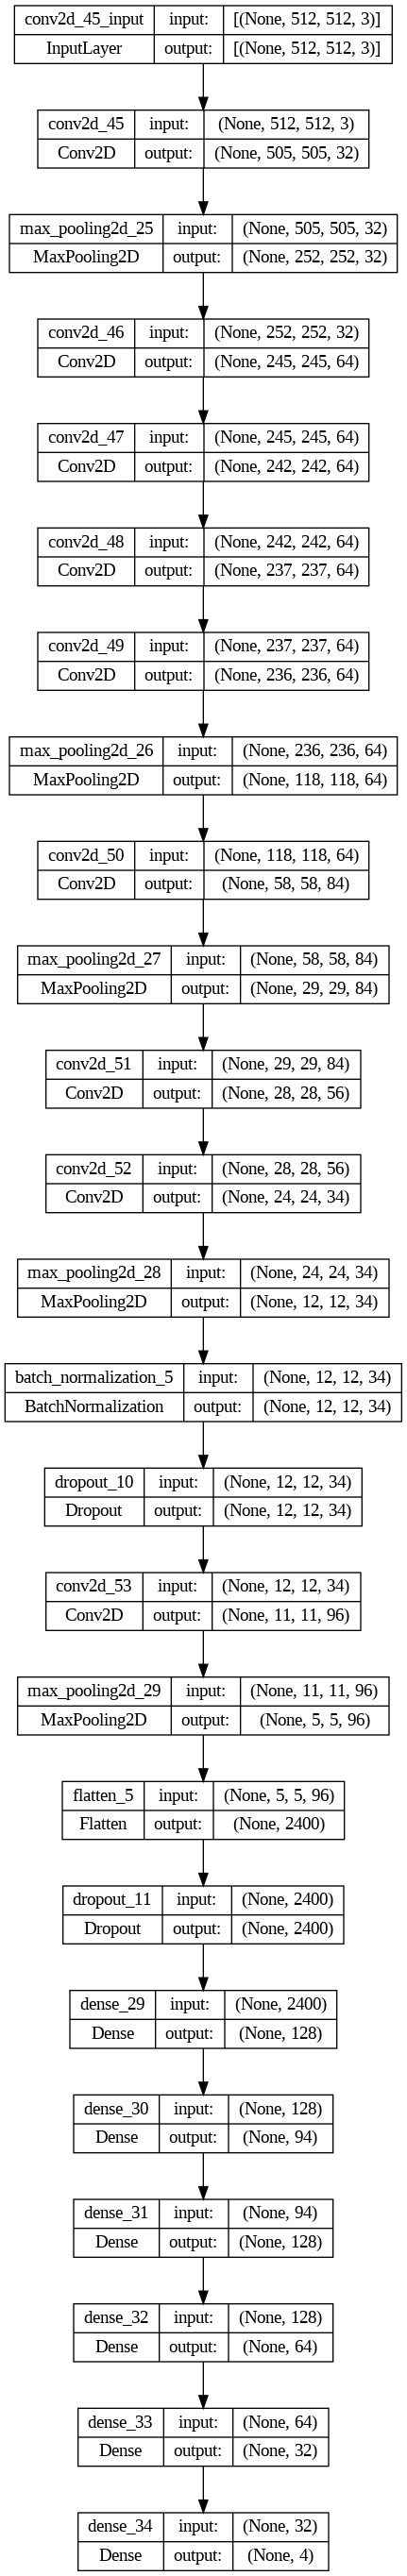

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 505, 505, 32)      6176      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 252, 252, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 245, 245, 64)      131136    
                                                                 
 conv2d_47 (Conv2D)          (None, 242, 242, 64)      65600     
                                                                 
 conv2d_48 (Conv2D)          (None, 237, 237, 64)      147520    
                                                                 
 conv2d_49 (Conv2D)          (None, 236, 236, 64)      16448     
                                                      